This notebook is for initial analysis of one- and two-layer shallow water model runs on an f-plane for different wind stress magnitudes.

In [1]:
%reset
import numpy as np
import netCDF4 as nc
import xarray as xr
import glob, os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cmocean

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar

In [3]:
# read ocean.stats files for all runs
tau = ['Wind_stress_tau_1', 'Wind_stress_tau_3', 'Wind_stress_tau_5', 'Wind_stress_tau_10', 'Wind_stress_tau_30', 'Wind_stress_tau_50', 'Wind_stress_tau_100']
ppdir = "/work/eay/MOM6/EddySaturation/"


#print(tau[0],tau[3],tau[6])
ds_FW1 = xr.open_dataset(ppdir+"Fixed_width_jet/"+tau[0]+"/prog.nc"); #os_FW1 = xr.open_dataset(ppdir+"Fixed_width_jet/"+tau[0]+"/ocean.stats.nc")
ds_VW1 = xr.open_dataset(ppdir+"Var_width_jet/"+tau[0]+"/prog.nc");   #os_VW1 = xr.open_dataset(ppdir+"Var_width_jet/"+tau[0]+"/ocean.stats.nc")
ds_FW3 = xr.open_dataset(ppdir+"Fixed_width_jet/"+tau[1]+"/prog.nc");
ds_VW3 = xr.open_dataset(ppdir+"Var_width_jet/"+tau[1]+"/prog.nc");  
ds_FW5 = xr.open_dataset(ppdir+"Fixed_width_jet/"+tau[2]+"/prog.nc")
ds_VW5 = xr.open_dataset(ppdir+"Var_width_jet/"+tau[2]+"/prog.nc")

ds_FW10 = xr.open_dataset(ppdir+"Fixed_width_jet/"+tau[3]+"/prog.nc")
ds_VW10 = xr.open_dataset(ppdir+"Var_width_jet/"+tau[3]+"/prog.nc")
ds_FW30 = xr.open_dataset(ppdir+"Fixed_width_jet/"+tau[4]+"/prog.nc");
ds_VW30 = xr.open_dataset(ppdir+"Var_width_jet/"+tau[4]+"/prog.nc");  
ds_FW50 = xr.open_dataset(ppdir+"Fixed_width_jet/"+tau[5]+"/prog.nc")
ds_VW50 = xr.open_dataset(ppdir+"Var_width_jet/"+tau[5]+"/prog.nc")

ds_FW100 = xr.open_dataset(ppdir+"Fixed_width_jet/"+tau[6]+"/prog.nc")
ds_VW100 = xr.open_dataset(ppdir+"Var_width_jet/"+tau[6]+"/prog.nc")


#print(ds_FW1)


In [4]:
print(ds_FW1)

<xarray.Dataset>
Dimensions:  (Time: 1095, xh: 400, xq: 400, yh: 800, yq: 800, zi: 2, zl: 1)
Coordinates:
  * xq       (xq) float64 4.0 8.0 12.0 16.0 ... 1.592e+03 1.596e+03 1.6e+03
  * yh       (yh) float64 2.0 6.0 10.0 14.0 ... 3.19e+03 3.194e+03 3.198e+03
  * zl       (zl) float64 1.028e+03
  * Time     (Time) object 0001-01-11 00:00:00 ... 0030-12-25 00:00:00
  * xh       (xh) float64 2.0 6.0 10.0 14.0 ... 1.59e+03 1.594e+03 1.598e+03
  * yq       (yq) float64 4.0 8.0 12.0 16.0 ... 3.192e+03 3.196e+03 3.2e+03
  * zi       (zi) float64 0.0 2.056e+03
Data variables:
    u        (Time, zl, yh, xq) float32 ...
    v        (Time, zl, yq, xh) float32 ...
    h        (Time, zl, yh, xh) float32 ...
    e        (Time, zi, yh, xh) float32 ...
    uh       (Time, zl, yh, xq) float32 ...
    vh       (Time, zl, yq, xh) float32 ...
Attributes:
    filename:   prog.nc
    title:      Channel
    grid_type:  regular
    grid_tile:  N/A


In [5]:
Time=ds_FW1.Time.values; #Time10=ds_FW10.Time.values; Time100=ds_FW100.Time.values
xh   =ds_FW1.xh.values; yh   =ds_FW1.yh.values; 

#Fixed width
FW1_u=ds_FW1.u.values[-1,0,:,:];     FW1_v=ds_FW1.v.values[-1,0,:,:];     FW1_h=ds_FW1.h.values[-1,0,:,:];     FW1_KE=(FW1_v**2.+FW1_u**2.)**0.5             
#FW1_MKE=np.nanmean(ds_FW1.u.values[:,0,:,:],axis=0); FW1_EKE=FW1_KE-FW1_MKE;

FW3_u=ds_FW3.u.values[-1,0,:,:];     FW3_v=ds_FW3.v.values[-1,0,:,:];     FW3_h=ds_FW3.h.values[-1,0,:,:];     FW3_KE=(FW3_v**2.+FW3_u**2.)**0.5  
FW3_MKE=np.nanmean(ds_FW3.u.values[:,0,:,:],axis=0); FW1_EKE=FW1_KE-FW1_MKE;

FW5_u=ds_FW5.u.values[-1,0,:,:];     FW5_v=ds_FW5.v.values[-1,0,:,:];     FW5_h=ds_FW5.h.values[-1,0,:,:];     FW5_KE=(FW5_v**2.+FW5_u**2.)**0.5  
FW10_u=ds_FW10.u.values[-1,0,:,:];   FW10_v=ds_FW10.v.values[-1,0,:,:];   FW10_h=ds_FW10.h.values[-1,0,:,:];   FW10_KE=(FW10_v**2.+FW10_u**2.)**0.5  
FW30_u=ds_FW30.u.values[-1,0,:,:];   FW30_v=ds_FW30.v.values[-1,0,:,:];   FW30_h=ds_FW30.h.values[-1,0,:,:];   FW30_KE=(FW30_v**2.+FW30_u**2.)**0.5 
FW50_u=ds_FW50.u.values[-1,0,:,:];   FW50_v=ds_FW50.v.values[-1,0,:,:];   FW50_h=ds_FW50.h.values[-1,0,:,:];   FW50_KE=(FW50_v**2.+FW50_u**2.)**0.5
FW100_u=ds_FW100.u.values[-1,0,:,:]; FW100_v=ds_FW100.v.values[-1,0,:,:]; FW100_h=ds_FW100.h.values[-1,0,:,:]; FW100_KE=(FW100_v**2.+FW100_u**2.)**0.5



NameError: name 'FW1_MKE' is not defined

In [ ]:
#Variable width 
VW1_u=ds_VW1.u.values[-1,0,:,:];     VW1_v=ds_VW1.v.values[-1,0,:,:];     VW1_h=ds_VW1.h.values[-1,0,:,:];     VW1_KE=(VW1_v**2.+VW1_u**2.)**0.5
VW3_u=ds_VW3.u.values[-1,0,:,:];     VW3_v=ds_VW3.v.values[-1,0,:,:];     VW3_h=ds_VW3.h.values[-1,0,:,:];     VW3_KE=(VW3_v**2.+VW3_u**2.)**0.5
VW5_u=ds_VW5.u.values[-1,0,:,:];     VW5_v=ds_VW5.v.values[-1,0,:,:];     VW5_h=ds_VW5.h.values[-1,0,:,:];     VW5_KE=(VW5_v**2.+VW5_u**2.)**0.5
VW10_u=ds_VW10.u.values[-1,0,:,:];   VW10_v=ds_VW10.v.values[-1,0,:,:];   VW10_h=ds_VW10.h.values[-1,0,:,:];   VW10_KE=(VW10_v**2.+VW10_u**2.)**0.5
VW30_u=ds_VW30.u.values[-1,0,:,:];   VW30_v=ds_VW30.v.values[-1,0,:,:];   VW30_h=ds_VW30.h.values[-1,0,:,:];   VW30_KE=(VW30_v**2.+VW30_u**2.)**0.5
VW50_u=ds_VW50.u.values[-1,0,:,:];   VW50_v=ds_VW50.v.values[-1,0,:,:];   VW50_h=ds_VW50.h.values[-1,0,:,:];   VW50_KE=(VW50_v**2.+VW50_u**2.)**0.5
VW100_u=ds_VW100.u.values[-1,0,:,:]; VW100_v=ds_VW100.v.values[-1,0,:,:]; VW100_h=ds_VW100.h.values[-1,0,:,:]; VW100_KE=(VW100_v**2.+VW100_u**2.)**0.5        



In [ ]:
FW1_u.shape
yh.shape

In [ ]:
# fig, axs = plt.subplots(1,2,figsize=(5, 4), dpi=200, facecolor='w', edgecolor='k')

# axs[0].set_title('Depth (m)',fontsize=16)
# axs[0].set_xlabel('X (km)',fontsize=16)
# axs[0].set_ylabel('Y (km)',fontsize=16);
# plotted =axs[0].pcolor(xh,yh,depth,cmap=cmocean.cm.turbid_r)
# axs[0].set_aspect('equal', 'box')
# colorbar(plotted)

# axs[1].set_title('Wind stress (Pa)',fontsize=16)
# axs[1].set_xlabel('X (km)',fontsize=16)
# axs[1].set_yticklabels([''])
# plotted =axs[1].pcolor(xh,yh,tau_x,cmap=cmocean.cm.curl)#,vmin=-.05,vmax=.05)
# axs[1].set_aspect('equal', 'box')
# colorbar(plotted)


# plt.tight_layout(h_pad=1)

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axs = plt.subplots(3,3,figsize=(7, 14), dpi=200, facecolor='w', edgecolor='k')

axs[0,0].set_title('FW Tau_1',fontsize=16)
axs[0,0].set_xticklabels([''])
axs[0,0].set_ylabel('Y (km)',fontsize=16);
plotted =axs[0,0].pcolor(xh,yh,FW1_u,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[0,0].set_aspect('equal', 'box')
#colorbar(plotted)

axs[0,1].set_title('FW Tau_3',fontsize=16)
axs[0,1].set_yticklabels(['']); axs[0,1].set_xticklabels([''])
plotted =axs[0,1].pcolor(xh,yh,FW3_u,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[0,1].set_aspect('equal', 'box')
#colorbar(plotted)

axs[0,2].set_title('FW Tau_5',fontsize=16)
axs[0,2].set_yticklabels(['']); axs[0,2].set_xticklabels([''])
#axs[0,2].set_xlabel('X (km)',fontsize=16)
#axs[0,2].set_ylabel('Y (km)',fontsize=16);
plotted =axs[0,2].pcolor(xh,yh,FW5_u,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[0,2].set_aspect('equal', 'box')
#colorbar(plotted)

axs[1,0].set_title('FW Tau_10',fontsize=16)
axs[1,0].set_xticklabels([''])
axs[1,0].set_ylabel('Y (km)',fontsize=16);
plotted =axs[1,0].pcolor(xh,yh,FW10_u,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[1,0].set_aspect('equal', 'box')
#colorbar(plotted)

axs[1,1].set_title('FW Tau_30',fontsize=16)
axs[1,1].set_yticklabels([''])
axs[1,1].set_xticklabels([''])
plotted =axs[1,1].pcolor(xh,yh,FW30_u,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[1,1].set_aspect('equal', 'box')
#colorbar(plotted)

axs[1,2].set_title('FW Tau_50',fontsize=16)
axs[1,2].set_yticklabels(['']) 
axs[1,2].set_xticklabels([''])
plotted =axs[1,2].pcolor(xh,yh,FW50_u,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[1,2].set_aspect('equal', 'box')
#colorbar(plotted)

axs[2,0].set_title('FW Tau_100',fontsize=16)
axs[2,0].set_xlabel('X (km)',fontsize=16)
plotted =axs[2,0].pcolor(xh,yh,FW100_u,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[2,0].set_aspect('equal', 'box')

divider = make_axes_locatable(axs[2,1])
cax = divider.append_axes('left', size='25%', pad=0.15)
fig.colorbar(plotted, cax=cax, orientation='vertical')

axs[2,1].axis('off'); 
axs[2,2].axis('off')

plt.tight_layout(h_pad=1)


In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axs = plt.subplots(3,3,figsize=(7, 14), dpi=200, facecolor='w', edgecolor='k')

axs[0,0].set_title('VW Tau_1',fontsize=16)
axs[0,0].set_xticklabels([''])
axs[0,0].set_ylabel('Y (km)',fontsize=16);
plotted =axs[0,0].pcolor(xh,yh,VW1_u,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[0,0].set_aspect('equal', 'box')
#colorbar(plotted)

axs[0,1].set_title('VW Tau_3',fontsize=16)
axs[0,1].set_yticklabels(['']); axs[0,1].set_xticklabels([''])
plotted =axs[0,1].pcolor(xh,yh,VW3_u,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[0,1].set_aspect('equal', 'box')
#colorbar(plotted)

axs[0,2].set_title('VW Tau_5',fontsize=16)
axs[0,2].set_yticklabels(['']); axs[0,2].set_xticklabels([''])
#axs[0,2].set_xlabel('X (km)',fontsize=16)
#axs[0,2].set_ylabel('Y (km)',fontsize=16);
plotted =axs[0,2].pcolor(xh,yh,VW5_u,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[0,2].set_aspect('equal', 'box')
#colorbar(plotted)

axs[1,0].set_title('VW Tau_10',fontsize=16)
axs[1,0].set_xticklabels([''])
axs[1,0].set_ylabel('Y (km)',fontsize=16);
plotted =axs[1,0].pcolor(xh,yh,VW10_u,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[1,0].set_aspect('equal', 'box')
#colorbar(plotted)

axs[1,1].set_title('VW Tau_30',fontsize=16)
axs[1,1].set_yticklabels([''])
axs[1,1].set_xticklabels([''])
plotted =axs[1,1].pcolor(xh,yh,VW30_u,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[1,1].set_aspect('equal', 'box')
#colorbar(plotted)

axs[1,2].set_title('VW Tau_50',fontsize=16)
axs[1,2].set_yticklabels(['']) 
axs[1,2].set_xticklabels([''])
plotted =axs[1,2].pcolor(xh,yh,VW50_u,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[1,2].set_aspect('equal', 'box')
#colorbar(plotted)

axs[2,0].set_title('VW Tau_100',fontsize=16)
axs[2,0].set_xlabel('X (km)',fontsize=16)
plotted =axs[2,0].pcolor(xh,yh,VW100_u,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[2,0].set_aspect('equal', 'box')

divider = make_axes_locatable(axs[2,1])
cax = divider.append_axes('left', size='25%', pad=0.15)
fig.colorbar(plotted, cax=cax, orientation='vertical')

axs[2,1].axis('off'); 
axs[2,2].axis('off')

plt.tight_layout(h_pad=1)


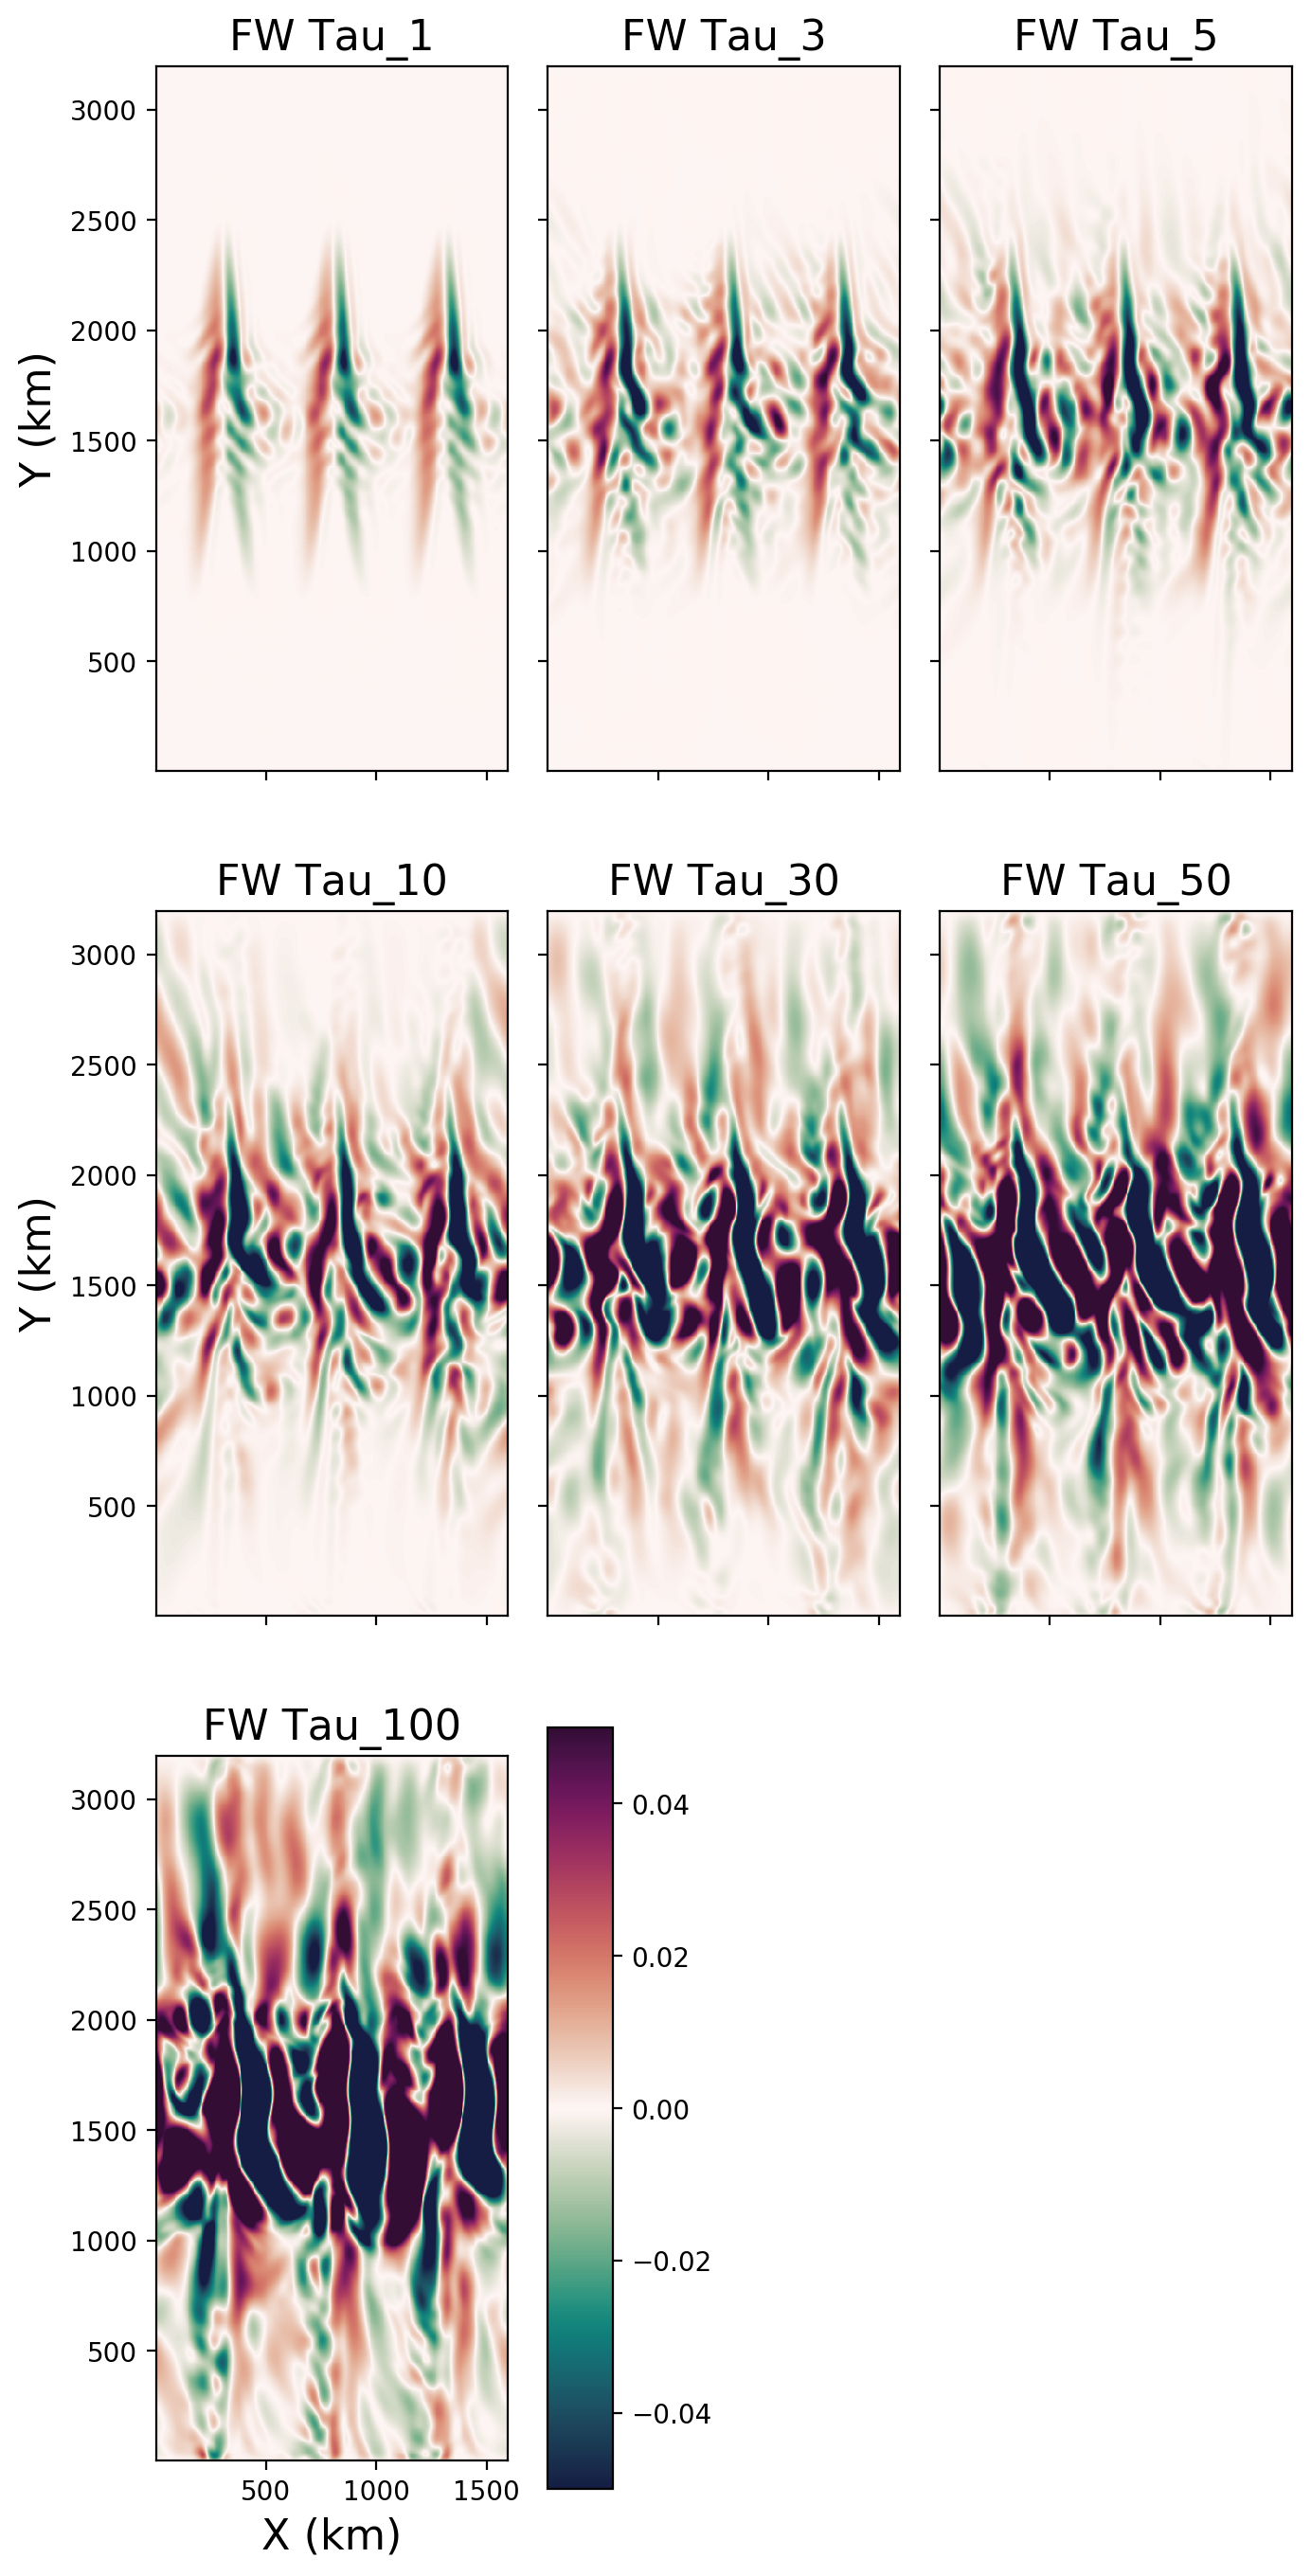

In [38]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axs = plt.subplots(3,3,figsize=(7, 14), dpi=200, facecolor='w', edgecolor='k')

axs[0,0].set_title('FW Tau_1',fontsize=16)
axs[0,0].set_xticklabels([''])
axs[0,0].set_ylabel('Y (km)',fontsize=16);
plotted =axs[0,0].pcolor(xh,yh,FW1_v,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[0,0].set_aspect('equal', 'box')
#colorbar(plotted)

axs[0,1].set_title('FW Tau_3',fontsize=16)
axs[0,1].set_yticklabels(['']); axs[0,1].set_xticklabels([''])
plotted =axs[0,1].pcolor(xh,yh,FW3_v,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[0,1].set_aspect('equal', 'box')
#colorbar(plotted)

axs[0,2].set_title('FW Tau_5',fontsize=16)
axs[0,2].set_yticklabels(['']); axs[0,2].set_xticklabels([''])
#axs[0,2].set_xlabel('X (km)',fontsize=16)
#axs[0,2].set_ylabel('Y (km)',fontsize=16);
plotted =axs[0,2].pcolor(xh,yh,FW5_v,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[0,2].set_aspect('equal', 'box')
#colorbar(plotted)

axs[1,0].set_title('FW Tau_10',fontsize=16)
axs[1,0].set_xticklabels([''])
axs[1,0].set_ylabel('Y (km)',fontsize=16);
plotted =axs[1,0].pcolor(xh,yh,FW10_v,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[1,0].set_aspect('equal', 'box')
#colorbar(plotted)

axs[1,1].set_title('FW Tau_30',fontsize=16)
axs[1,1].set_yticklabels([''])
axs[1,1].set_xticklabels([''])
plotted =axs[1,1].pcolor(xh,yh,FW30_v,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[1,1].set_aspect('equal', 'box')
#colorbar(plotted)

axs[1,2].set_title('FW Tau_50',fontsize=16)
axs[1,2].set_yticklabels(['']) 
axs[1,2].set_xticklabels([''])
plotted =axs[1,2].pcolor(xh,yh,FW50_v,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[1,2].set_aspect('equal', 'box')
#colorbar(plotted)

axs[2,0].set_title('FW Tau_100',fontsize=16)
axs[2,0].set_xlabel('X (km)',fontsize=16)
plotted =axs[2,0].pcolor(xh,yh,FW100_v,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[2,0].set_aspect('equal', 'box')

divider = make_axes_locatable(axs[2,1])
cax = divider.append_axes('left', size='25%', pad=0.15)
fig.colorbar(plotted, cax=cax, orientation='vertical')

axs[2,1].axis('off'); 
axs[2,2].axis('off')

plt.tight_layout(h_pad=1)


In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axs = plt.subplots(3,3,figsize=(7, 14), dpi=200, facecolor='w', edgecolor='k')

axs[0,0].set_title('VW Tau_1',fontsize=16)
axs[0,0].set_xticklabels([''])
axs[0,0].set_ylabel('Y (km)',fontsize=16);
plotted =axs[0,0].pcolor(xh,yh,VW1_v,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[0,0].set_aspect('equal', 'box')
#colorbar(plotted)

axs[0,1].set_title('VW Tau_3',fontsize=16)
axs[0,1].set_yticklabels(['']); axs[0,1].set_xticklabels([''])
plotted =axs[0,1].pcolor(xh,yh,VW3_v,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[0,1].set_aspect('equal', 'box')
#colorbar(plotted)

axs[0,2].set_title('VW Tau_5',fontsize=16)
axs[0,2].set_yticklabels(['']); axs[0,2].set_xticklabels([''])
#axs[0,2].set_xlabel('X (km)',fontsize=16)
#axs[0,2].set_ylabel('Y (km)',fontsize=16);
plotted =axs[0,2].pcolor(xh,yh,VW5_v,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[0,2].set_aspect('equal', 'box')
#colorbar(plotted)

axs[1,0].set_title('VW Tau_10',fontsize=16)
axs[1,0].set_xticklabels([''])
axs[1,0].set_ylabel('Y (km)',fontsize=16);
plotted =axs[1,0].pcolor(xh,yh,VW10_v,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[1,0].set_aspect('equal', 'box')
#colorbar(plotted)

axs[1,1].set_title('VW Tau_30',fontsize=16)
axs[1,1].set_yticklabels([''])
axs[1,1].set_xticklabels([''])
plotted =axs[1,1].pcolor(xh,yh,VW30_v,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[1,1].set_aspect('equal', 'box')
#colorbar(plotted)

axs[1,2].set_title('VW Tau_50',fontsize=16)
axs[1,2].set_yticklabels(['']) 
axs[1,2].set_xticklabels([''])
plotted =axs[1,2].pcolor(xh,yh,VW50_v,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[1,2].set_aspect('equal', 'box')
#colorbar(plotted)

axs[2,0].set_title('VW Tau_100',fontsize=16)
axs[2,0].set_xlabel('X (km)',fontsize=16)
plotted =axs[2,0].pcolor(xh,yh,VW100_v,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
axs[2,0].set_aspect('equal', 'box')

divider = make_axes_locatable(axs[2,1])
cax = divider.append_axes('left', size='25%', pad=0.15)
fig.colorbar(plotted, cax=cax, orientation='vertical')

axs[2,1].axis('off'); 
axs[2,2].axis('off')

plt.tight_layout(h_pad=1)


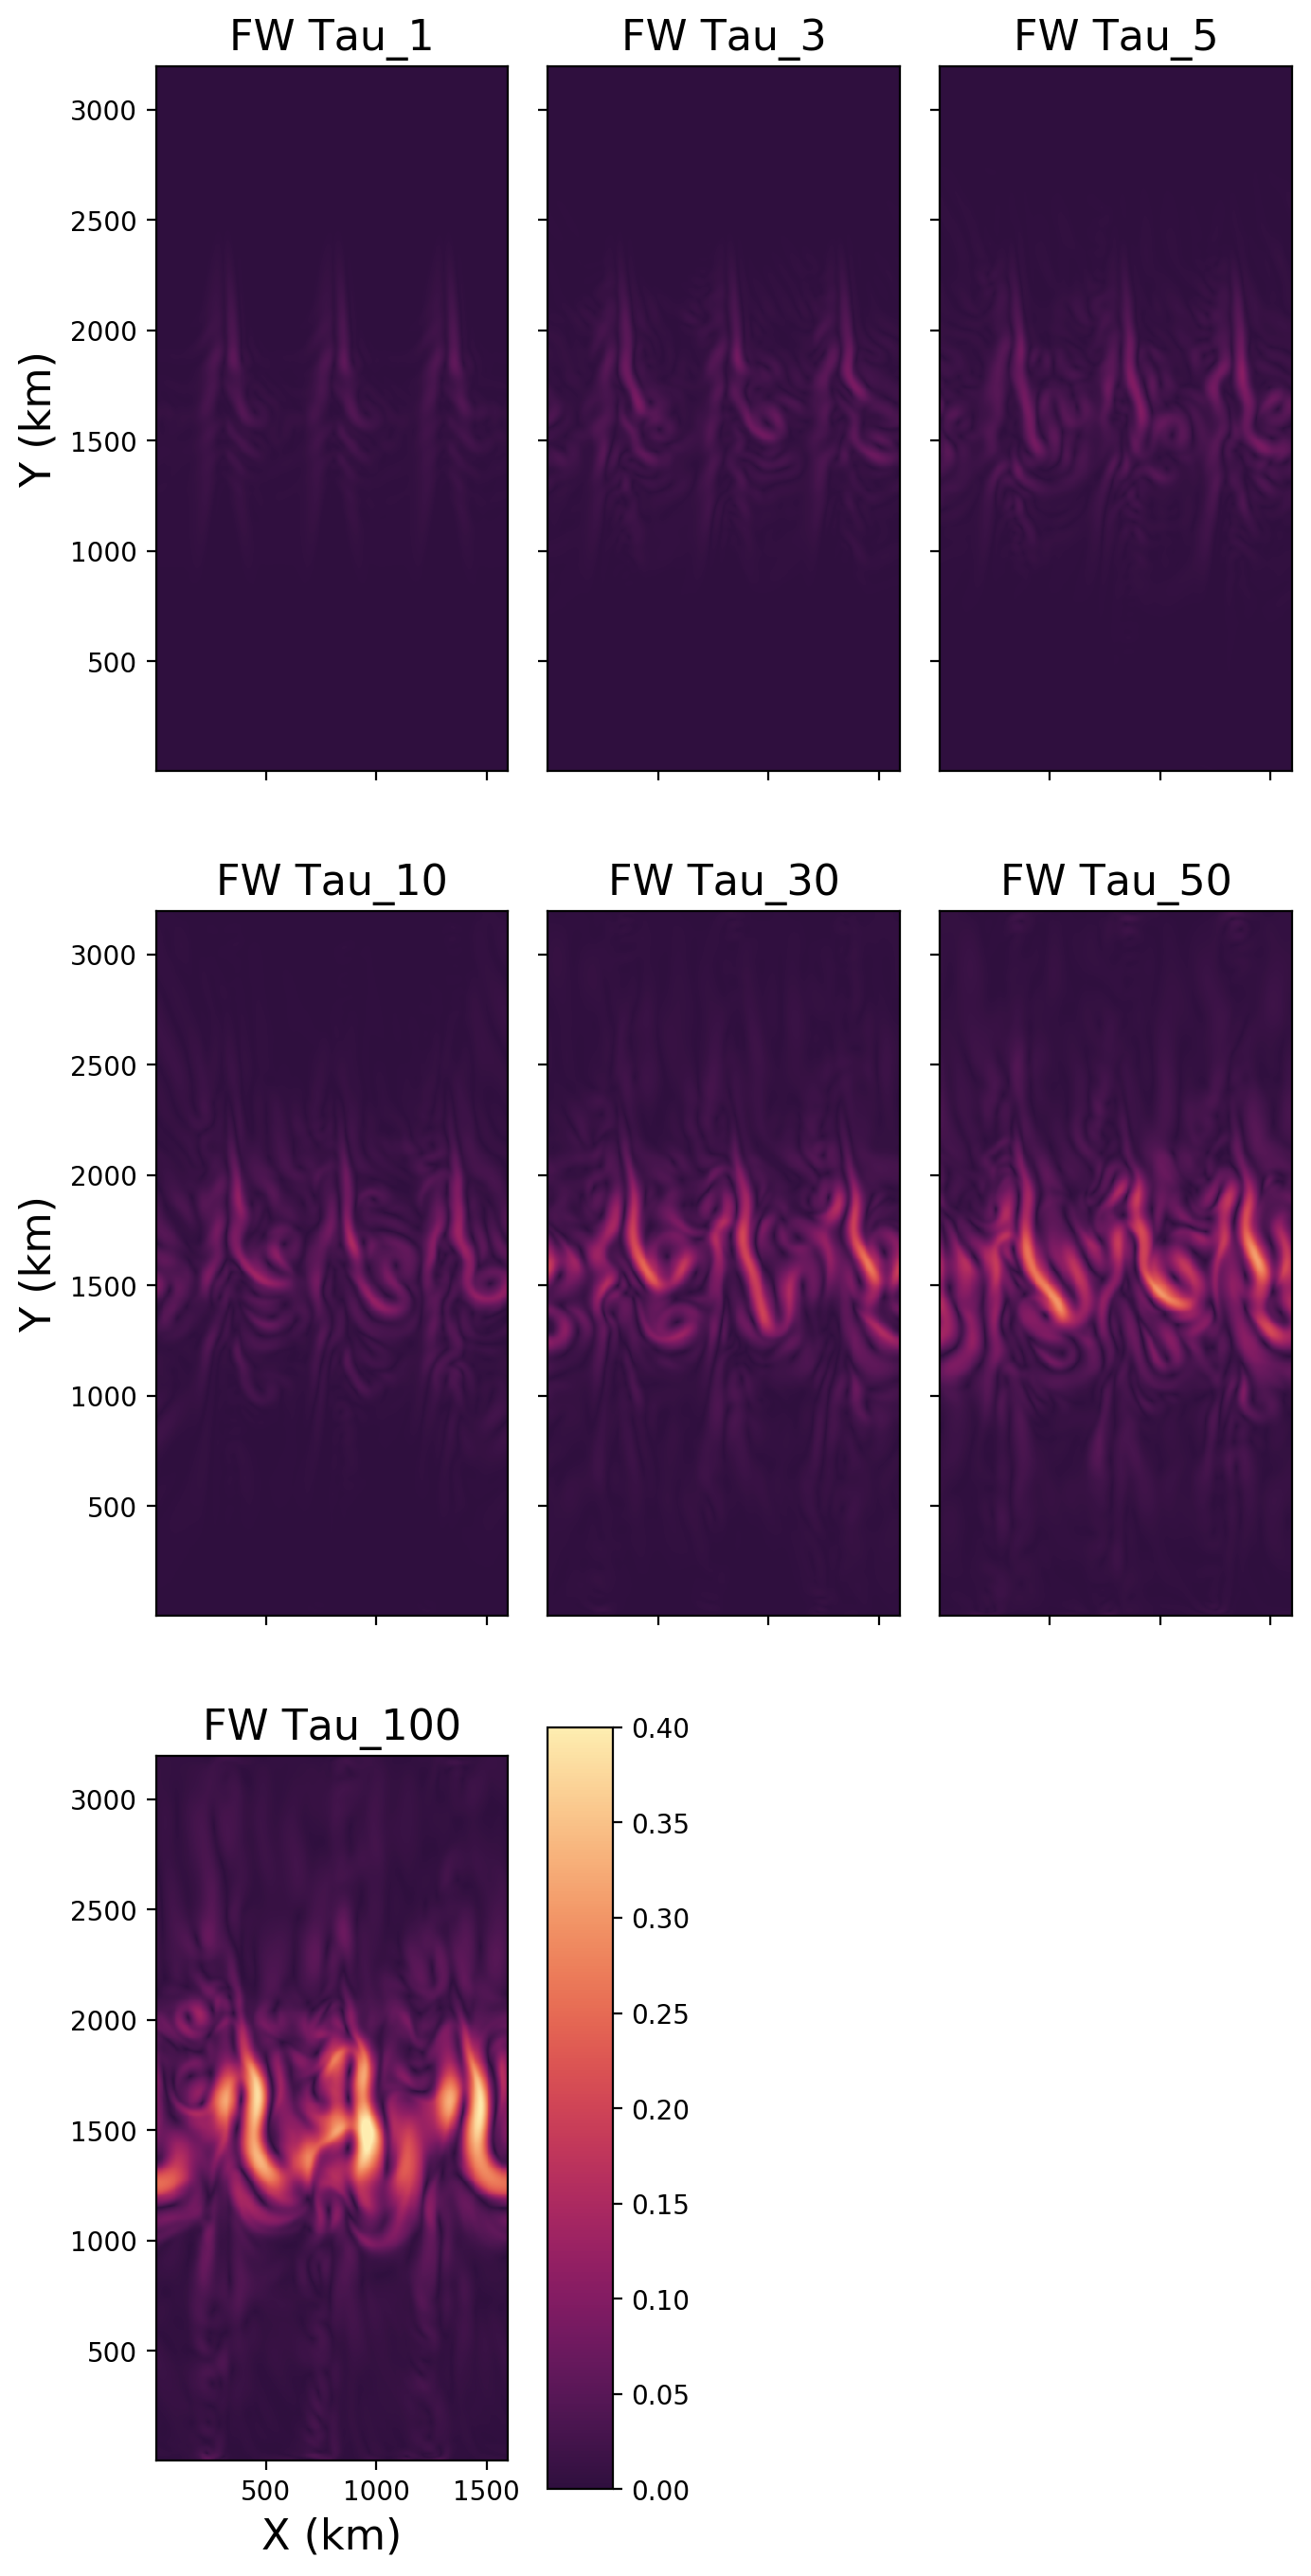

In [41]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axs = plt.subplots(3,3,figsize=(7, 14), dpi=200, facecolor='w', edgecolor='k')

axs[0,0].set_title('FW Tau_1',fontsize=16)
axs[0,0].set_xticklabels([''])
axs[0,0].set_ylabel('Y (km)',fontsize=16);
plotted =axs[0,0].pcolor(xh,yh,FW1_KE,cmap=cmocean.cm.matter_r,vmin=0,vmax=0.4)
axs[0,0].set_aspect('equal', 'box')
#colorbar(plotted)

axs[0,1].set_title('FW Tau_3',fontsize=16)
axs[0,1].set_yticklabels(['']); axs[0,1].set_xticklabels([''])
plotted =axs[0,1].pcolor(xh,yh,FW3_KE,cmap=cmocean.cm.matter_r,vmin=0,vmax=0.4)
axs[0,1].set_aspect('equal', 'box')
#colorbar(plotted)

axs[0,2].set_title('FW Tau_5',fontsize=16)
axs[0,2].set_yticklabels(['']); axs[0,2].set_xticklabels([''])
#axs[0,2].set_xlabel('X (km)',fontsize=16)
#axs[0,2].set_ylabel('Y (km)',fontsize=16);
plotted =axs[0,2].pcolor(xh,yh,FW5_KE,cmap=cmocean.cm.matter_r,vmin=0,vmax=0.4)
axs[0,2].set_aspect('equal', 'box')
#colorbar(plotted)

axs[1,0].set_title('FW Tau_10',fontsize=16)
axs[1,0].set_xticklabels([''])
axs[1,0].set_ylabel('Y (km)',fontsize=16);
plotted =axs[1,0].pcolor(xh,yh,FW10_KE,cmap=cmocean.cm.matter_r,vmin=0,vmax=0.4)
axs[1,0].set_aspect('equal', 'box')
#colorbar(plotted)

axs[1,1].set_title('FW Tau_30',fontsize=16)
axs[1,1].set_yticklabels([''])
axs[1,1].set_xticklabels([''])
plotted =axs[1,1].pcolor(xh,yh,FW30_KE,cmap=cmocean.cm.matter_r,vmin=0,vmax=0.4)
axs[1,1].set_aspect('equal', 'box')
#colorbar(plotted)

axs[1,2].set_title('FW Tau_50',fontsize=16)
axs[1,2].set_yticklabels(['']) 
axs[1,2].set_xticklabels([''])
plotted =axs[1,2].pcolor(xh,yh,FW50_KE,cmap=cmocean.cm.matter_r,vmin=0,vmax=0.4)
axs[1,2].set_aspect('equal', 'box')
#colorbar(plotted)

axs[2,0].set_title('FW Tau_100',fontsize=16)
axs[2,0].set_xlabel('X (km)',fontsize=16)
plotted =axs[2,0].pcolor(xh,yh,FW100_KE,cmap=cmocean.cm.matter_r,vmin=0,vmax=0.4)
axs[2,0].set_aspect('equal', 'box')

divider = make_axes_locatable(axs[2,1])
cax = divider.append_axes('left', size='25%', pad=0.15)
fig.colorbar(plotted, cax=cax, orientation='vertical')

axs[2,1].axis('off'); 
axs[2,2].axis('off')

plt.tight_layout(h_pad=1)


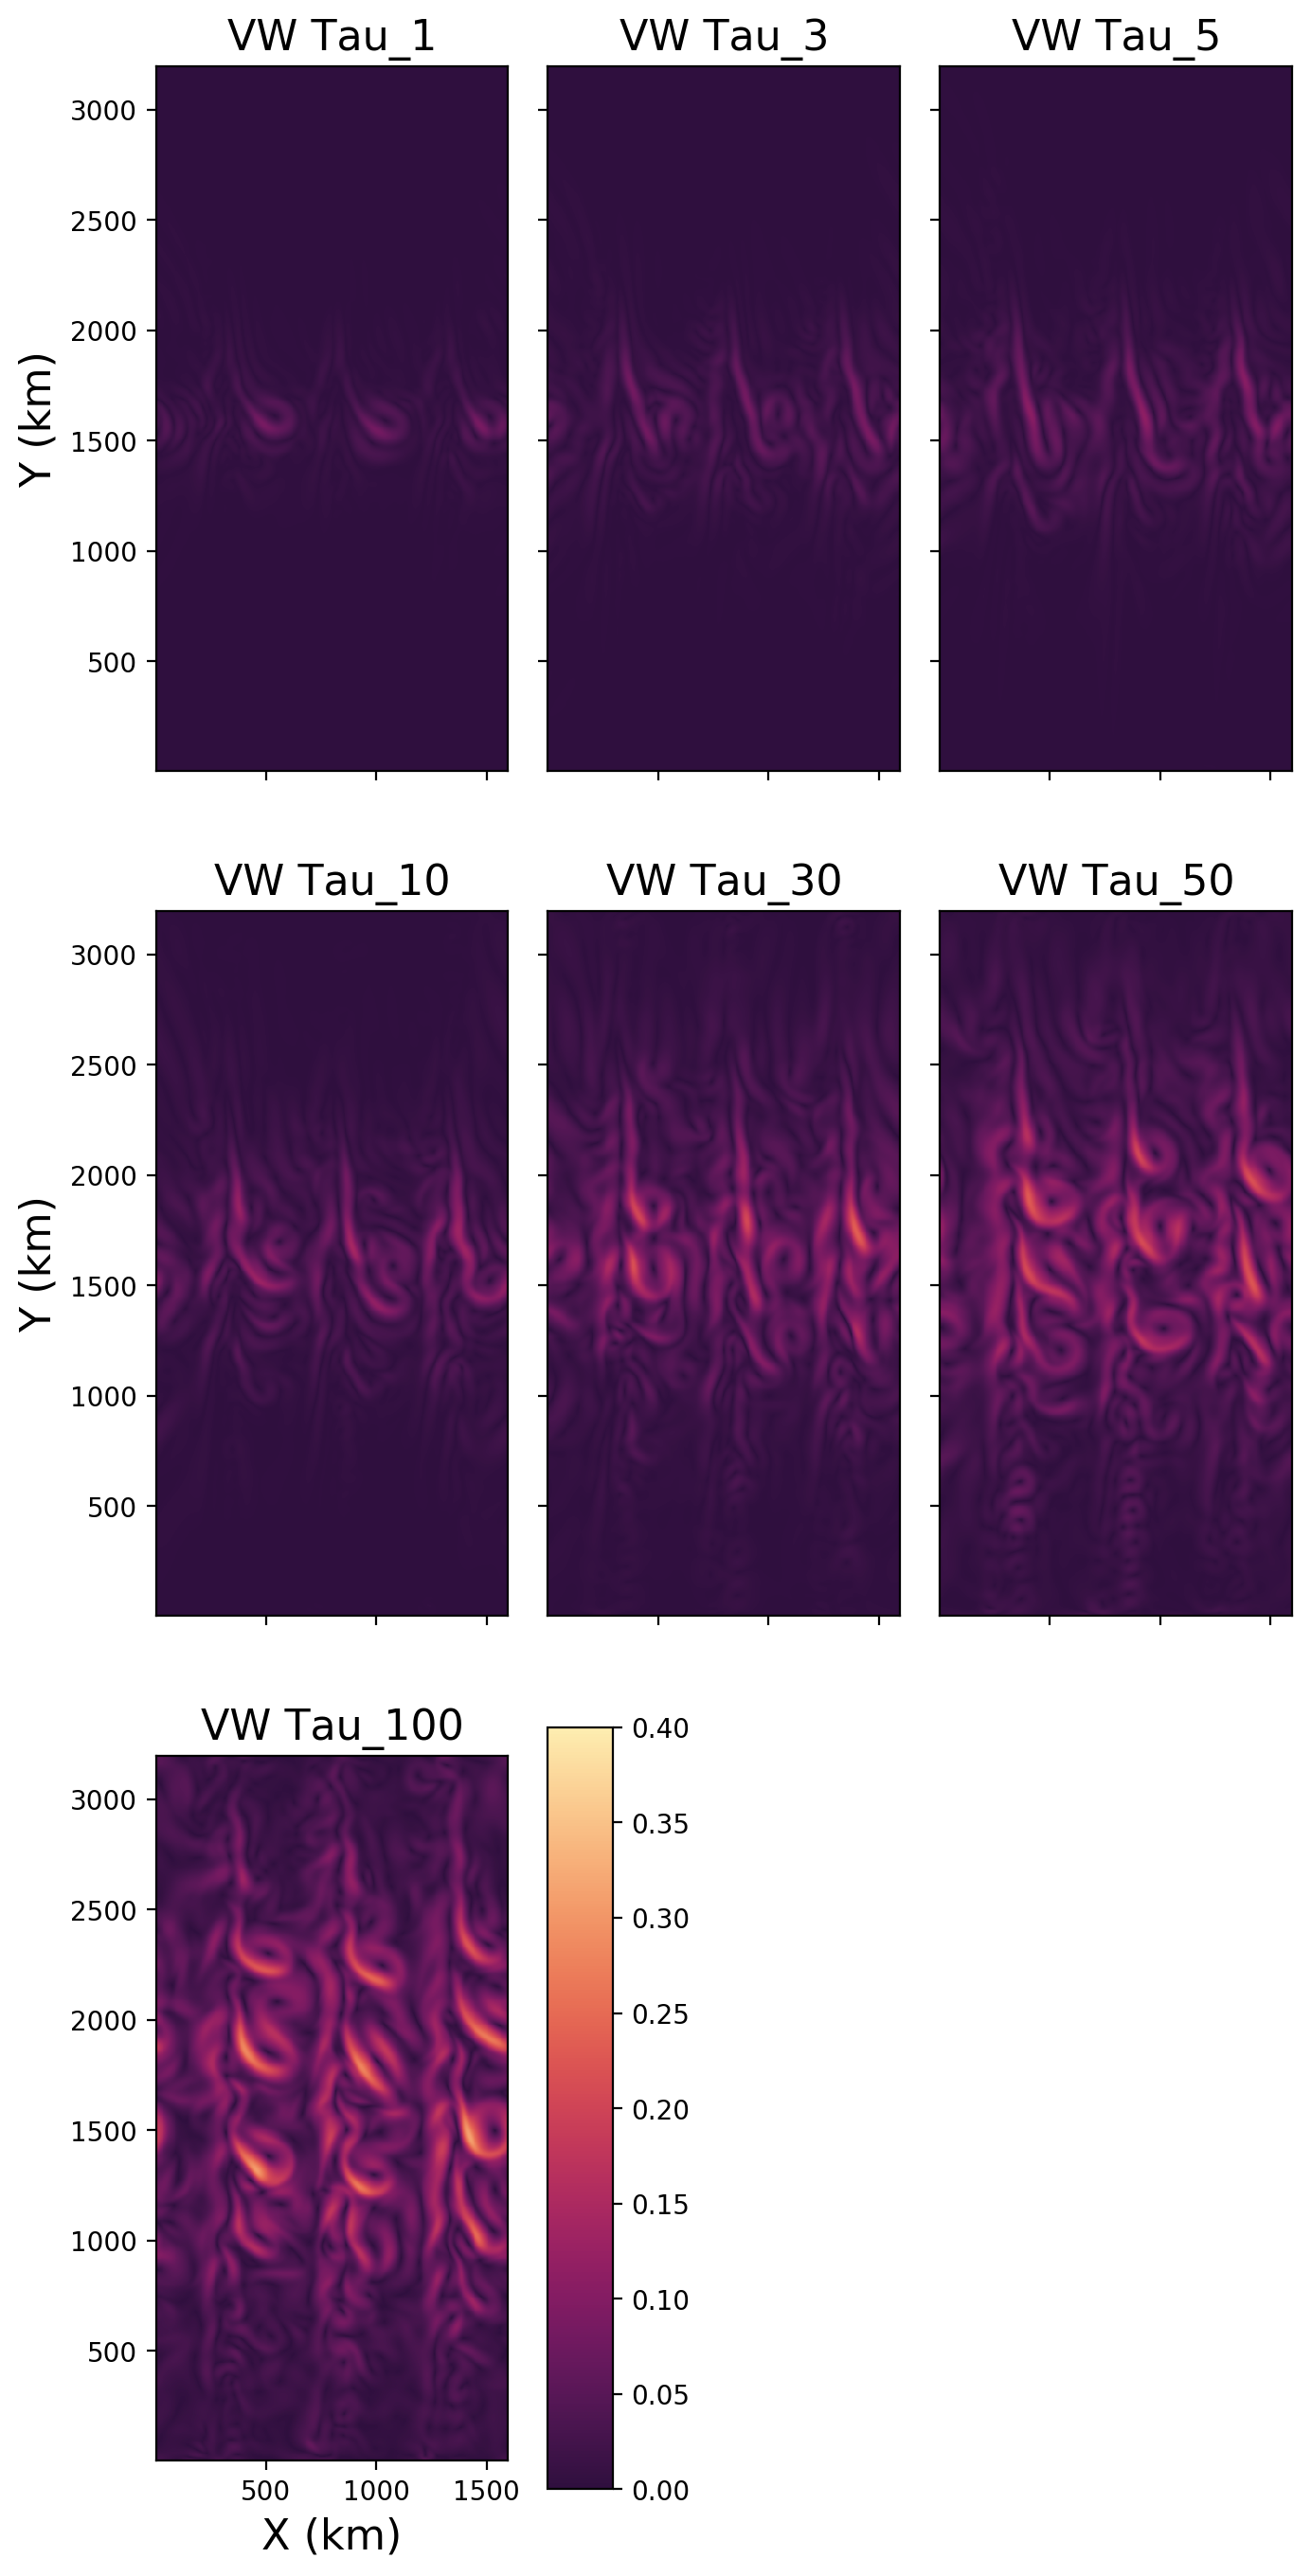

In [42]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axs = plt.subplots(3,3,figsize=(7, 14), dpi=200, facecolor='w', edgecolor='k')

axs[0,0].set_title('VW Tau_1',fontsize=16)
axs[0,0].set_xticklabels([''])
axs[0,0].set_ylabel('Y (km)',fontsize=16);
plotted =axs[0,0].pcolor(xh,yh,VW1_KE,cmap=cmocean.cm.matter_r,vmin=0,vmax=0.4)
axs[0,0].set_aspect('equal', 'box')
#colorbar(plotted)

axs[0,1].set_title('VW Tau_3',fontsize=16)
axs[0,1].set_yticklabels(['']); axs[0,1].set_xticklabels([''])
plotted =axs[0,1].pcolor(xh,yh,VW3_KE,cmap=cmocean.cm.matter_r,vmin=0,vmax=0.4)
axs[0,1].set_aspect('equal', 'box')
#colorbar(plotted)

axs[0,2].set_title('VW Tau_5',fontsize=16)
axs[0,2].set_yticklabels(['']); axs[0,2].set_xticklabels([''])
#axs[0,2].set_xlabel('X (km)',fontsize=16)
#axs[0,2].set_ylabel('Y (km)',fontsize=16);
plotted =axs[0,2].pcolor(xh,yh,VW5_KE,cmap=cmocean.cm.matter_r,vmin=0,vmax=0.4)
axs[0,2].set_aspect('equal', 'box')
#colorbar(plotted)

axs[1,0].set_title('VW Tau_10',fontsize=16)
axs[1,0].set_xticklabels([''])
axs[1,0].set_ylabel('Y (km)',fontsize=16);
plotted =axs[1,0].pcolor(xh,yh,VW10_KE,cmap=cmocean.cm.matter_r,vmin=0,vmax=0.4)
axs[1,0].set_aspect('equal', 'box')
#colorbar(plotted)

axs[1,1].set_title('VW Tau_30',fontsize=16)
axs[1,1].set_yticklabels([''])
axs[1,1].set_xticklabels([''])
plotted =axs[1,1].pcolor(xh,yh,VW30_KE,cmap=cmocean.cm.matter_r,vmin=0,vmax=0.4)
axs[1,1].set_aspect('equal', 'box')
#colorbar(plotted)

axs[1,2].set_title('VW Tau_50',fontsize=16)
axs[1,2].set_yticklabels(['']) 
axs[1,2].set_xticklabels([''])
plotted =axs[1,2].pcolor(xh,yh,VW50_KE,cmap=cmocean.cm.matter_r,vmin=0,vmax=0.4)
axs[1,2].set_aspect('equal', 'box')
#colorbar(plotted)

axs[2,0].set_title('VW Tau_100',fontsize=16)
axs[2,0].set_xlabel('X (km)',fontsize=16)
plotted =axs[2,0].pcolor(xh,yh,VW100_KE,cmap=cmocean.cm.matter_r,vmin=0,vmax=0.4)
axs[2,0].set_aspect('equal', 'box')

divider = make_axes_locatable(axs[2,1])
cax = divider.append_axes('left', size='25%', pad=0.15)
fig.colorbar(plotted, cax=cax, orientation='vertical')

axs[2,1].axis('off'); 
axs[2,2].axis('off')

plt.tight_layout(h_pad=1)


In [17]:
# fig, axs = plt.subplots(1,3,figsize=(7, 4), dpi=200, facecolor='w', edgecolor='k')

# axs[0].set_title('VW Tau_1',fontsize=16)
# axs[0].set_xlabel('X (km)',fontsize=16)
# axs[0].set_ylabel('Y (km)',fontsize=16);
# plotted =axs[0].pcolor(xh,yh,VW1_u,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
# axs[0].set_aspect('equal', 'box')
# #colorbar(plotted)

# axs[1].set_title('VW Tau_10',fontsize=16)
# axs[1].set_xlabel('X (km)',fontsize=16)
# axs[1].set_yticklabels([''])
# plotted =axs[1].pcolor(xh,yh,VW10_u,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
# axs[1].set_aspect('equal', 'box')
# #colorbar(plotted)

# axs[2].set_title('VW Tau_100',fontsize=16)
# axs[2].set_xlabel('X (km)',fontsize=16)
# axs[2].set_yticklabels([''])
# plotted =axs[2].pcolor(xh,yh,VW100_u,cmap=cmocean.cm.curl,vmin=-.05,vmax=.05)
# axs[2].set_aspect('equal', 'box')
# colorbar(plotted)

# plt.tight_layout(h_pad=1)